In [53]:
#Import packages for Gross Revenue Correlation Project 
#using IMDB dataset
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None




In [54]:
#'encoding= cp1252' fixed an error UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 5: invalid continuation byte
df = pd.read_csv('movies.csv', encoding='cp1252')


In [55]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [56]:
#See if theres any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
#looks like no missing data in columns

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [57]:
# check data types for columns
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [58]:
# change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [59]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
#create column for correct year of movie release. start at position -4 and everything to the right

df['yearcorrect'] = df['released'].astype(str).str[-4:]

In [60]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [63]:
#Sort by gross $
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,12/18/2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,12/18/2009,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,12/19/1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,6/12/2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,5/4/2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,4/12/2013,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,3/9/2012,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,1/19/2014,106,5.7,Jemma Dallender,21070,Neil Elman,2013
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,10/1/1997,84,5.7,Will Friedle,5034,Andy Burg,1997


In [62]:
# able to scroll the chart 
pd.set_option('display.max_rows', none)

In [64]:
#Unique Values
df['company'].drop_duplicates().sort_values(ascending=False)


5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

In [13]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


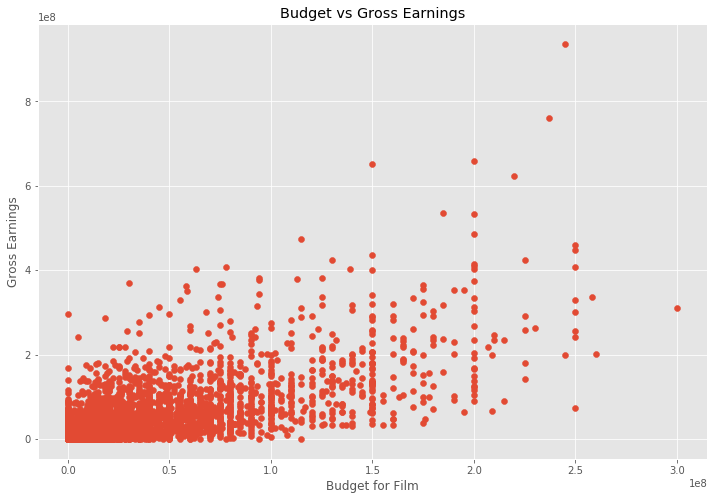

In [14]:
#Hypothesis: High budget correlates with high gross, the company as well

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [50]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,2082,89,8.1,2454,299174,3716,1986,15
1,6000000,1680,54,1296,4,70136369,1821,7,1584,103,7.8,1605,264740,1970,1986,15
2,15000000,1680,54,2645,0,179800601,6203,6,1409,110,6.9,2345,236909,1852,1986,15
3,18500000,2062,54,1066,0,85160248,295,8,1836,137,8.4,2192,540152,1629,1986,15
4,9000000,2122,54,2123,1,18564613,1872,6,1983,90,6.9,1139,36636,2549,1986,15


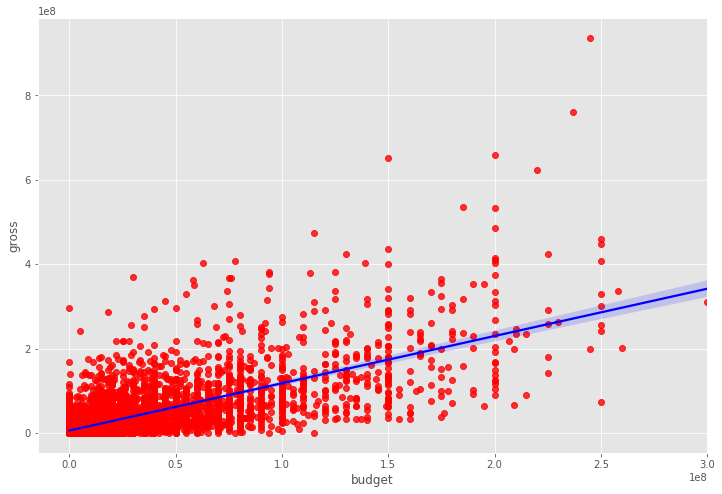

In [16]:
#Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [17]:
#check correlation, there are different types of methods pearson,kendal, spearman
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


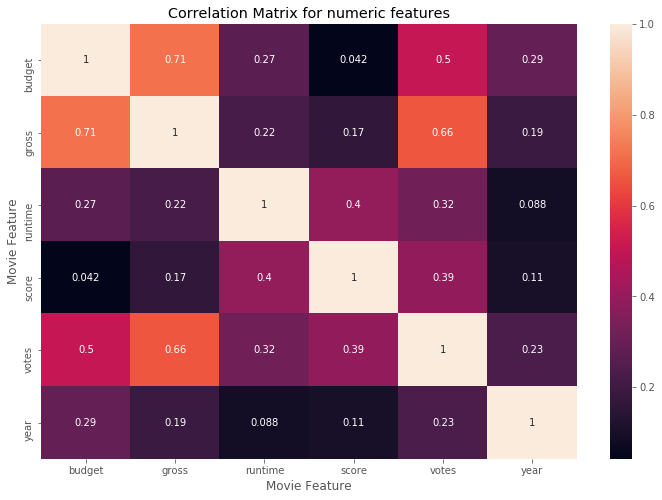

In [18]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [19]:
#look At company
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [42]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,2082,89,8.1,2454,299174,3716,1986,15
1,6000000,1680,54,1296,4,70136369,1821,7,1584,103,7.8,1605,264740,1970,1986,15
2,15000000,1680,54,2645,0,179800601,6203,6,1409,110,6.9,2345,236909,1852,1986,15
3,18500000,2062,54,1066,0,85160248,295,8,1836,137,8.4,2192,540152,1629,1986,15
4,9000000,2122,54,2123,1,18564613,1872,6,1983,90,6.9,1139,36636,2549,1986,15


In [41]:
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,2082,89,8.1,2454,299174,3716,1986,15
1,6000000,1680,54,1296,4,70136369,1821,7,1584,103,7.8,1605,264740,1970,1986,15
2,15000000,1680,54,2645,0,179800601,6203,6,1409,110,6.9,2345,236909,1852,1986,15
3,18500000,2062,54,1066,0,85160248,295,8,1836,137,8.4,2192,540152,1629,1986,15
4,9000000,2122,54,2123,1,18564613,1872,6,1983,90,6.9,1139,36636,2549,1986,15


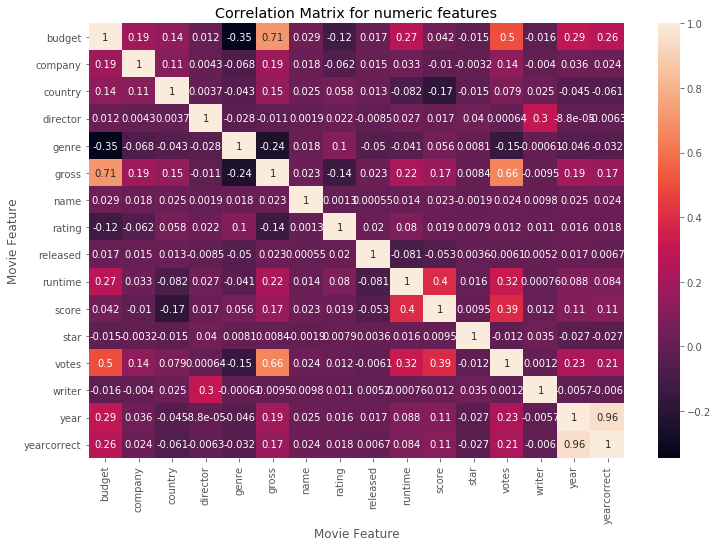

In [25]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show()

In [26]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.017001
             runtime        0.268226
             score          0.042145
             star          -0.015061
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.263932
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             released       0.015060
             runtime        0.033058
             score         -0.010426
 

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.346794
genre        budget        -0.346794
             gross         -0.242676
gross        genre         -0.242676
country      score         -0.174414
score        country       -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
released     runtime       -0.081438
runtime      released      -0.081438
genre        company       -0.068330
company      genre         -0.068330
             rating        -0.062250
rating       company       -0.062250
yearcorrect  country       -0.060556
country      yearcorrect   -0.060556
score        released      -0.052549
released     score         -0.052549
             genre         -0.049804
genre        released      -0.049804
             year          -0.046259
y

In [40]:
high_corr = sorted_pairs[(sorted_pairs) > 0.50]

high_corr

votes        budget         0.503924
budget       votes          0.503924
gross        votes          0.662457
votes        gross          0.662457
gross        budget         0.712196
budget       gross          0.712196
yearcorrect  year           0.955777
year         yearcorrect    0.955777
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Budget and Votes high correlatioon to gross revenue